In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Understandinng the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.shape

(7787, 12)

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
## unique values %
round(df.nunique()/df.count()*100,2)

show_id         100.00
type              0.03
title           100.00
director         75.01
cast             96.63
country           9.35
date_added       20.12
release_year      0.94
rating            0.18
duration          2.77
listed_in         6.32
description      99.77
dtype: float64

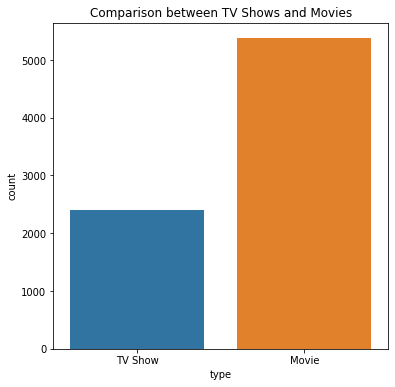

In [7]:
## Lets check for those values which has less than 10% values
plt.figure(figsize=(6,6))
plt.title('Comparison between TV Shows and Movies')
sns.countplot(df['type'])
plt.show()

In [8]:
## sub breaking the years into decade
df['decade'] = pd.cut(x = df['release_year'],bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])

#### As you can see that most of the content was released in the last 10 years

In [9]:
groupByDecade = df.groupby(['decade'])
groupByDecade['show_id'].count()

decade
(1920, 1930]       1
(1930, 1940]       0
(1940, 1950]      14
(1950, 1960]      15
(1960, 1970]      23
(1970, 1980]      74
(1980, 1990]     117
(1990, 2000]     239
(2000, 2010]     867
(2010, 2020]    6406
Name: show_id, dtype: int64

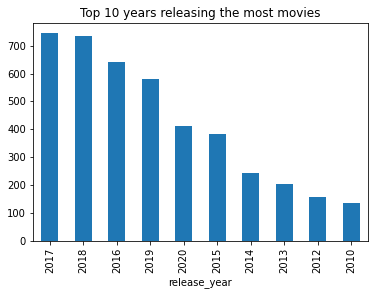

In [10]:
df_movies = df[df['type'] == 'Movie']
contentMovieByYear = df_movies.groupby(['release_year'])
plt.title('Top 10 years releasing the most movies')
contentMovieByYear.show_id.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

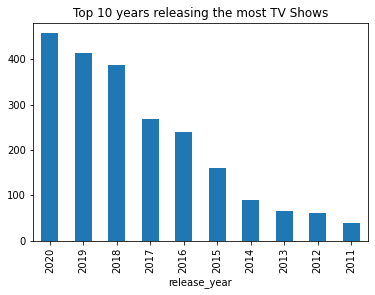

In [11]:
df_shows = df[df['type'] == 'TV Show']
contentShowByYear = df_shows.groupby(['release_year'])
plt.title('Top 10 years releasing the most TV Shows')
contentShowByYear.show_id.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

In [12]:
## for country

top_contri = df_movies.groupby(['country'])['show_id'].count().sort_values(ascending=False).head(5)
print(top_contri)
top_contri = top_contri.reset_index(name='count')
top_contri

country
United States     1850
India              852
United Kingdom     193
Canada             118
Egypt               89
Name: show_id, dtype: int64


,country,count
0,United States,1850
1,India,852
2,United Kingdom,193
3,Canada,118
4,Egypt,89


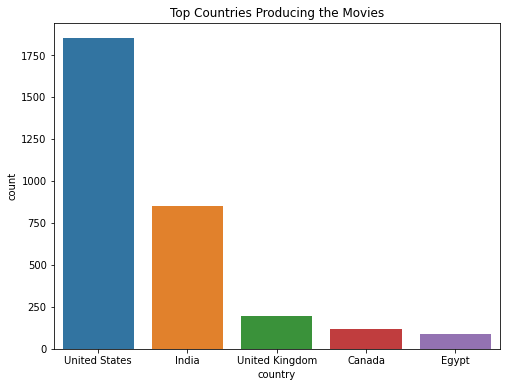

In [13]:
plt.figure(figsize=(8,6))
plt.title('Top Countries Producing the Movies')
sns.barplot(x = 'country', y='count', data=top_contri)
plt.show()

In [14]:
top_contri_shows = df_shows.groupby(['country'])['show_id'].count().sort_values(ascending=False).head(5)
top_contri_shows = top_contri_shows.reset_index(name='count')
top_contri_shows

,country,count
0,United States,705
1,United Kingdom,204
2,Japan,157
3,South Korea,147
4,India,71


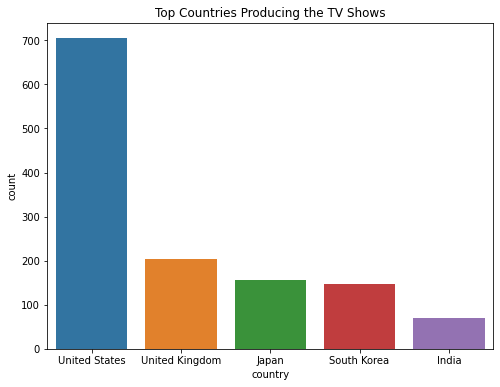

In [15]:
plt.figure(figsize=(8,6))
plt.title('Top Countries Producing the TV Shows')
sns.barplot(x = 'country', y='count', data=top_contri_shows)
plt.show()

1. USA is top country in producing TV Shows.
2. Japan and South Korea are also in Top 5 Countries to produce TV Shows.

### Exploring the director

In [16]:
director_df = df.copy()
director_df.director = director_df.director.str.strip().str.split(',')

In [17]:
director_df = director_df.explode('director')

In [18]:
top_dir = director_df[director_df['type'] == 'Movie'].groupby(['director'])['show_id'].count().sort_values(ascending=False).head(8)
top_dir = top_dir.reset_index()
top_dir.rename(columns={'show_id':'count'}, inplace=True)

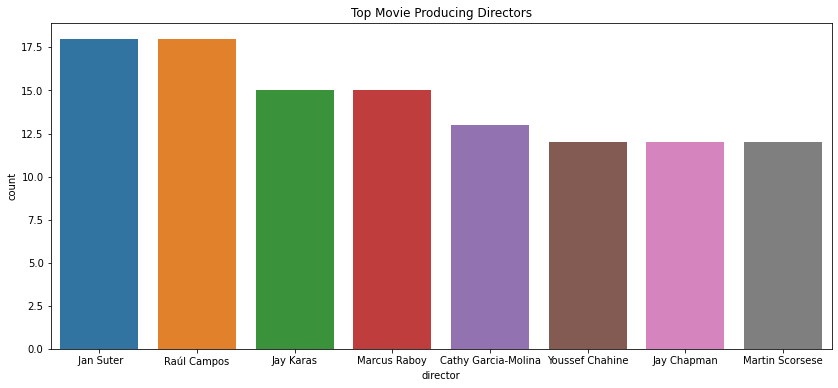

In [19]:
plt.figure(figsize=(14,6))
plt.title('Top Movie Producing Directors')
sns.barplot(x=top_dir['director'], y=top_dir['count'])
plt.show()

### Exploring the Duration of the Movies

In [20]:
## Removing the min part
df_movies.duration = df_movies.duration.str[0:-4]
df_movies.duration = df_movies.duration.astype('float')
df_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,decade
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93.0,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"(2010, 2020]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78.0,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","(2010, 2020]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","(2000, 2010]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123.0,Dramas,A brilliant group of students become card-coun...,"(2000, 2010]"
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95.0,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...","(2010, 2020]"


In [35]:
top_movies = df_movies.groupby(['country'])['duration'].agg(['count','mean']).sort_values(by='count',ascending=False).head(10)
top_movies = top_movies.reset_index()
top_movies.rename(columns={'mean':'Average Duration'},inplace=True)
top_movies

,country,count,Average Duration
0,United States,1850,89.393514
1,India,852,127.414319
2,United Kingdom,193,84.378238
3,Canada,118,82.372881
4,Spain,89,99.932584
5,Egypt,89,109.348315
6,Turkey,73,107.616438
7,Philippines,70,112.528571
8,France,69,93.231884
9,Japan,69,96.202899


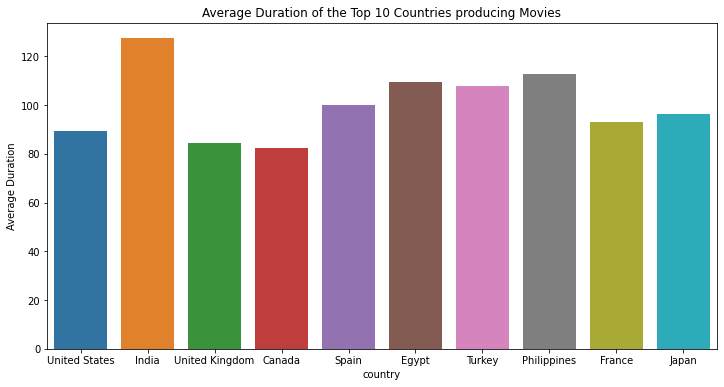

In [40]:
plt.figure(figsize=(12,6))
plt.title('Average Duration of the Top 10 Countries producing Movies')
sns.barplot(y = top_movies['Average Duration'], x = top_movies['country'])
plt.show()

1. Indian Movies are of longer duration as compared to other Country movies